In [63]:
# WEB SCRAPING

import requests
r = requests.get('http://worldpopulationreview.com/us-cities/')
c = r.content
from bs4 import BeautifulSoup
soup = BeautifulSoup(c, "lxml")
main_content = soup.find('div', attrs = {'class': 'section-content'})
content = main_content.find('ol').text
content

'\nNew York City, NY (Population: 8,601,186)\nLos Angeles, CA (Population: 4,057,841)\nChicago, IL (Population: 2,679,044)\nHouston, TX (Population: 2,359,480)\nPhoenix, AZ (Population: 1,711,356)\nPhiladelphia, PA (Population: 1,576,596)\nSan Antonio, TX (Population: 1,565,929)\nSan Diego, CA (Population: 1,453,775)\nDallas, TX (Population: 1,379,735)\nSan Jose, CA (Population: 1,033,519)\n'

In [64]:
# DATA CLEANING

import re
city_pattern = re.compile(r'^([A-Z]{1}.+?)(?:,)', flags = re.M)
cities = city_pattern.findall(content)

state_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
states = state_pattern.findall(content)
for j in range(len(cities)):
    cities[j] = cities[j] + ", " + states[j]

population = re.compile(r'\(Population:.+')
pops = population.findall(content)
counter = 0
for p in pops:
    pops[counter] = p[0:len(p)-1]
    counter = counter + 1
    
pops = [int(''.join(p[13:].split(','))) for p in pops]

In [67]:
# DATA FRAME

import pandas as pd

df = pd.DataFrame({'city': cities, 'population': pops})
df = df.sort_values('population', ascending = True).reset_index().drop(columns='index')
df

,city,population
0,"San Jose, CA",1033519
1,"Dallas, TX",1379735
2,"San Diego, CA",1453775
3,"San Antonio, TX",1565929
4,"Philadelphia, PA",1576596
5,"Phoenix, AZ",1711356
6,"Houston, TX",2359480
7,"Chicago, IL",2679044
8,"Los Angeles, CA",4057841
9,"New York City, NY",8601186


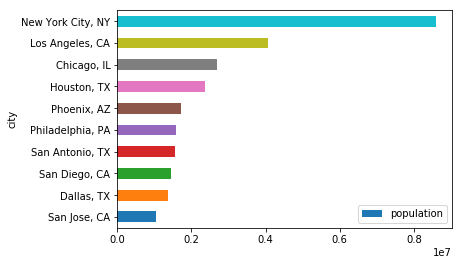

In [68]:
# DATA VISUALIZATION

df.plot(kind = 'barh', x = 'city', y = 'population')